In [ ]:
%tensorflow_version 2.x


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 8.4MB/s 
     |████████████████████████████████| 9.5MB 44.1MB/s 
     |████████████████████████████████| 2.1MB 54.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import requests
from io import StringIO
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import cufflinks as cf
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy import stats
import seaborn as sns
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd drive/

/content/drive


In [ ]:
pwd

'/content/drive'

In [ ]:
cd My  Drive


/content/drive/My Drive


In [ ]:
cd Major_Project/src/

[Errno 2] No such file or directory: 'Major_Project/src/'
/content/drive/My Drive/Major_Project/src


In [ ]:
df = pd.read_csv('sensor1_pp.csv',index_col = 0)
df

,ax(g),ay(g),az(g),wx(deg/s),wy(deg/s),wz(deg/s),AngleX(deg),AngleY(deg),AngleZ(deg),T(°),hx,hy,hz
ChipTime,,,,,,,,,,,,,
2020-02-18 15:40:20.960,-0.1851,0.1094,0.9927,-5.7373,-8.0566,5.1880,7.3663,11.4148,2.2852,18.11,929,-1405,27
2020-02-18 15:40:21.160,-0.1533,0.0942,1.0044,-6.1646,9.5215,0.2441,6.3062,10.0964,1.7084,18.15,924,-1399,47
2020-02-18 15:40:21.360,-0.1455,0.0859,1.0083,2.4414,1.5259,-1.0986,5.9656,9.5142,1.9391,18.14,896,-1369,51
2020-02-18 15:40:21.560,-0.1299,0.1064,1.0044,3.2959,-5.0659,9.2163,6.7072,8.4705,3.7573,18.14,931,-1369,49
2020-02-18 15:40:21.760,-0.1230,0.0986,1.0044,-4.5166,-6.5918,2.6245,6.3336,7.5751,4.5593,18.14,1012,-1426,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 11:41:17.960,0.6367,0.0605,0.7896,-1.0376,5.6763,0.0000,5.7404,-38.7103,11.8597,27.88,1316,1046,-1571
2020-02-28 11:41:18.160,0.6279,0.0527,0.8018,2.5024,11.9629,-0.1831,5.4602,-37.2107,12.8046,27.94,602,2811,-451
2020-02-28 11:41:18.360,0.5835,0.0669,0.8198,5.3711,10.3149,0.6714,5.7458,-35.1508,13.6011,27.88,1382,1107,-1501


In [ ]:
#@title
df.index = pd.to_datetime(df.index)
az_data = df['az(g)'].resample('1min').mean() 
az_data = az_data['2020-02-18':]
az_data = az_data[az_data.values > 1.014]

In [ ]:
# #@title
# df_az_frame = ax_data.to_frame()
# df_az_frame = df_az_frame['2020-02-19':'2020-02-24']

In [ ]:
#@title
train_size = int(len(df_az_frame) * 0.8)
test_size = len(df_az_frame) - train_size

train,test = df_az_frame.iloc[0:train_size], df_az_frame.iloc[train_size:len(df_az_frame)]
train = np.reshape(train,(train_size,1)) #Reshaping into (len,1)
test = np.reshape(test,(test_size,1))

print(train.shape, test.shape)

NameError: ignored

In [ ]:
#@title
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# scaler = scaler.fit(train)

# train = scaler.transform(train)

# test = scaler.transform(test)

**Prediction using RNN**

In [ ]:
#@title
def create_dataset(dataset,look_back=1):
    Xs, ys = [], []
    dataset = np.array(dataset)
    for i in range(len(dataset) - look_back - 1):
        v= dataset[i:(i + look_back)]
        Xs.append(v)
        ys.append(dataset[(i + look_back)])
    return np.array(Xs), np.array(ys)

In [ ]:
#@title
look_back = 20

(414699, 20, 1) (414699, 1)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



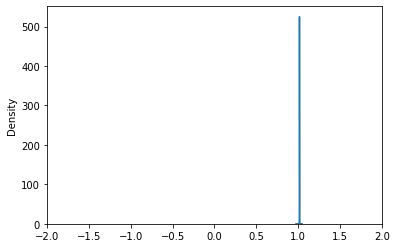

In [ ]:
#@title
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

print(X_train.shape, y_train.shape)

fig,ax = plt.subplots()
ax.set_xlim(-2,2,)
sns.distplot(train, ax=ax, kde=True)

In [ ]:
#@title
X_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))

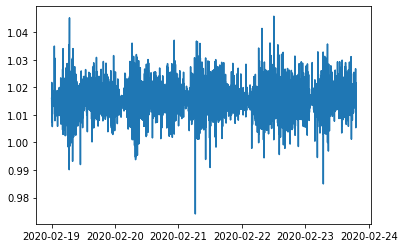

In [ ]:
#@title
plt.plot(train)

**Stationarity Test**

In [ ]:
#@title
stat, p = stats.normaltest(ax_data)
print('Statistics=%.3f, p=%.9f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=3050904.592, p=0.000000000
Data does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Kurtosis of normal distribution: 6786.732999932928
Skewness of normal distribution: -73.66366136325007


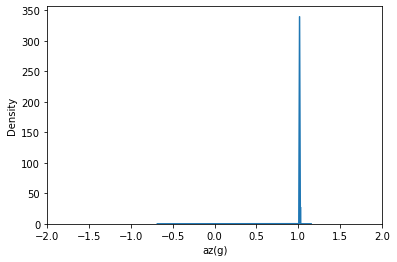

In [ ]:
#@title
fig,ax = plt.subplots();
ax.set_xlim(-2,2);
sns.distplot(ax_data);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(ax_data)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(ax_data)))

# **Modelling Using LSTM**

In [ ]:
#@title
from keras.layers import Dropout

In [ ]:
#@title
#Model 1
model = keras.Sequential()
model.add(keras.layers.LSTM(units = 32, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(0.01))

In [ ]:
#@title
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, 
                     verbose=1, shuffle=True)

Epoch 1/20
11664/11664 [==============================] - 25s 2ms/step - loss: 0.0125 - val_loss: 0.0065
Epoch 2/20
11664/11664 [==============================] - 23s 2ms/step - loss: 0.0039 - val_loss: 9.0102e-04
Epoch 3/20
11664/11664 [==============================] - 23s 2ms/step - loss: 0.0044 - val_loss: 0.0023
Epoch 4/20
11664/11664 [==============================] - 23s 2ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 5/20
11664/11664 [==============================] - 23s 2ms/step - loss: 0.0042 - val_loss: 9.2804e-04
Epoch 6/20
11664/11664 [==============================] - 23s 2ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 7/20
11664/11664 [==============================] - 23s 2ms/step - loss: 0.0040 - val_loss: 0.0063
Epoch 8/20
11664/11664 [==============================] - 23s 2ms/step - loss: 0.0042 - val_loss: 8.7399e-04
Epoch 9/20
11664/11664 [==============================] - 23s 2ms/step - loss: 0.0042 - val_loss: 0.0018
Epoch 10/20
11664/11664 [==================

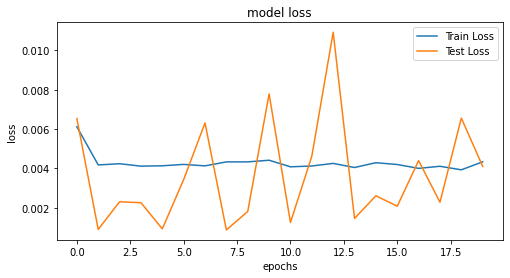

In [ ]:
#@title
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
# plt.yscale('log')
plt.legend(loc='upper right')
plt.show();

In [ ]:
#@title
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
#@title
test_predict[:10]

array([[1.0156618],
       [1.015659 ],
       [1.0156602],
       [1.0156605],
       [1.01566  ],
       [1.0156584],
       [1.0156615],
       [1.0156622],
       [1.0156617],
       [1.0156637]], dtype=float32)

In [ ]:
#@title
print('Train Mean Absolute Error:', keras.losses.MAE(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(keras.losses.MSE(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', keras.losses.MAE(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(keras.losses.MSE(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: tf.Tensor(0.6082469, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.60824794
Test Mean Absolute Error: tf.Tensor(0.0008573599, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.00085750397


In [ ]:
#@title
y_test

array([1.014808, 1.015756, 1.01578 , ..., 1.017452, 0.924364, 0.037624])

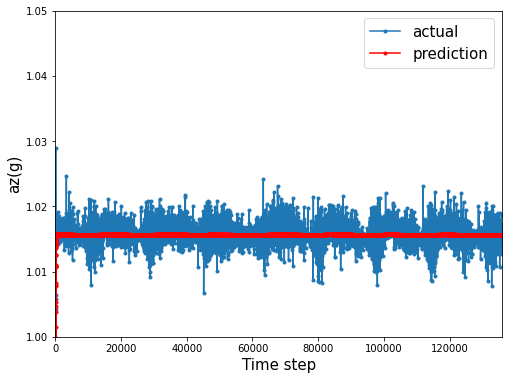

In [ ]:
#@title
aa=[x for x in range(len(train_predict))]
plt.figure(figsize=(8,6))
plt.plot(aa, y_train, marker='.', label="actual")
plt.plot(aa, train_predict, 'r', marker = '.', label="prediction")
plt.gca().set_ylim(1,1.05)
# plt.tick_params(left=False, labelleft=True) #remove ticks
#plt.tight_layout()
# plt.subplots_adjust(left=0.0)
plt.margins(0)
plt.ylabel('az(g)', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();


# actual_plot = mean = go.Scatter(x=aa,y=y_train,line=dict(color='chartreuse'))
# train_predict_plot = go.Scatter(x=aa,y=train_predict,line=dict(color='black'))
# layout = go.Layout(yaxis=dict(range=[1.0135,1.019]))
# fig4 = go.Figure(data = actual_plot,layout=layout)
# fig4.add_trace(train_predict_plot)
# fig4.show()

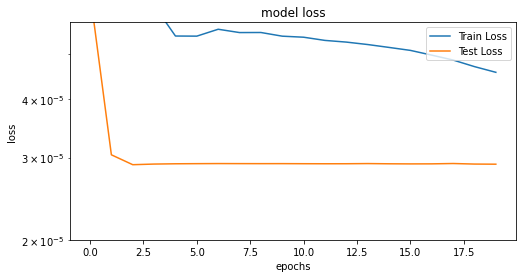

In [ ]:
#@title
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.yscale('log')
plt.ylim(2e-05,5.8548e-05)
# plt.yscale('log')
plt.legend(loc='upper right')
plt.show();

In [ ]:
#@title
y_test.shape, test_predict.shape

((33976,), (33976, 1))

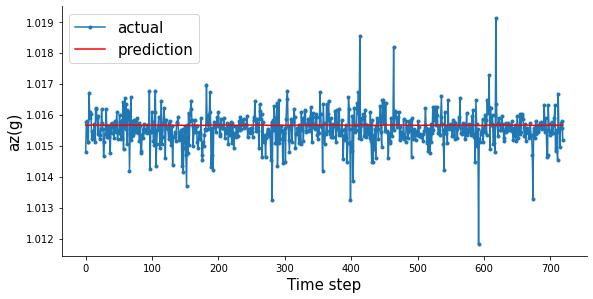

In [ ]:
#@title
aa=[x for x in range(720)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[:720], marker='.', label="actual")
plt.plot(aa, test_predict[:720], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('az(g)', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [ ]:
#@title
# layout = go.Layout(yaxis=dict(range=[1.0135,1.019]))
# fig2 = go.Figure(data = original,layout=layout)
# fig2.add_trace(mean)
# fig2.add_trace(std)
# fig2.show()

# **ARIMA**

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(15,6)

**Stationarity Test**

In [ ]:
def stationarity_check(timeseries):
  # Rolling statistics
  rolling_mean = timeseries.rolling(30,1).mean()
  rolling_std = timeseries.rolling(30,1).std()

  #Plot rolling statistics
  original = go.Scatter(x=timeseries.index,y=timeseries.values)
  mean = go.Scatter(x=rolling_mean.index,y=rolling_mean.values, line=dict(color='chartreuse'))
  std = go.Scatter(x=rolling_std.index,y=rolling_std.values, line=dict(color='black'))

  figx = go.Figure()
  figx.add_trace(original)
  figx.add_trace(mean)
  figx.show()
 
  return original,mean,std
  

In [ ]:
def Dickey_Fuller_test(timeseries):
  print('Dickey Fuller Test:')
  di_fu_test = adfuller(timeseries,autolag='AIC')
  df_results = pd.Series(di_fu_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in di_fu_test[4].items():
        df_results['Critical Value (%s)'%key] = value
  print (df_results)


 
  

In [ ]:
original,mean,std = stationarity_check(az_data)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
az_data_values = np.reshape(az_data.values, (len(az_data),1))
az_data_scaled = scaler.fit_transform(az_data_values)

In [ ]:
Dickey_Fuller_test(az_data_scaled)

Dickey Fuller Test:
Test Statistic                    -3.060276
p-value                            0.029636
#Lags Used                        42.000000
Number of Observations Used    14110.000000
Critical Value (1%)               -3.430814
Critical Value (5%)               -2.861745
Critical Value (10%)              -2.566879
dtype: float64


In [ ]:
# az_diff = az_data.diff()
# az_diff = az_diff.dropna()
# Dickey_Fuller_test(az_diff)
# az_diff.plot()

**p<0.05 ----> 95% confidence interval-------> time series is stationary**

**AUTO ARIMA**

In [ ]:
from pmdarima import auto_arima

**Working Model**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




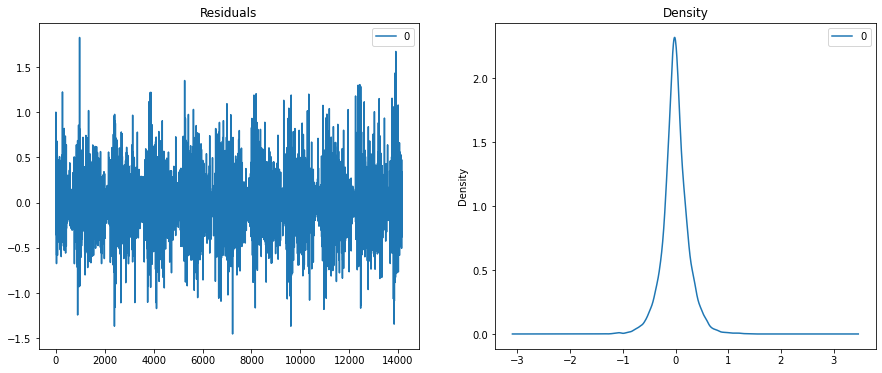

In [ ]:
# az_data_fit = auto_arima(az_data_scaled,trace=True,suppress_warnings=True,error_action='ignore')

train_size = np.int(len(az_data_scaled)*0.8)

train = az_data_scaled[0:train_size]
test = az_data_scaled[train_size:]

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(az_data_scaled,order=(2,0,1))
model=model.fit()
model.summary()

residuals = pd.DataFrame(model.resid)

fig, ax = plt.subplots(1,2)

residuals.plot(title="Residuals", ax=ax[0])

residuals.plot(kind='kde', title='Density', ax=ax[1])


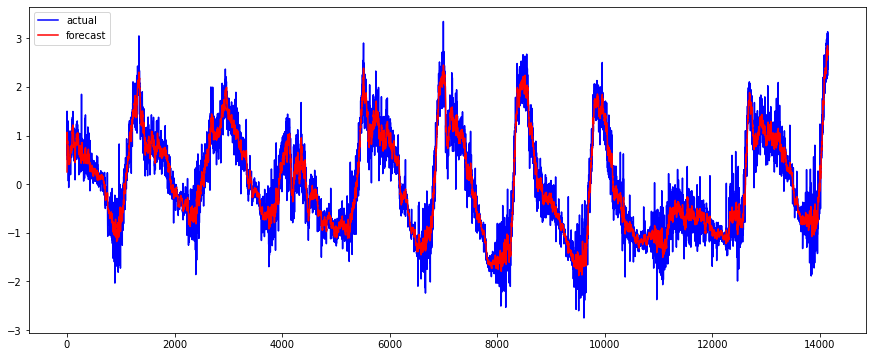

In [ ]:
fig,ax = plt.subplots()
ax.plot(az_data_scaled, '-b', label = 'actual')
ax.plot(model.fittedvalues, '-r', label = 'forecast')
leg = ax.legend()
# model.fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.m

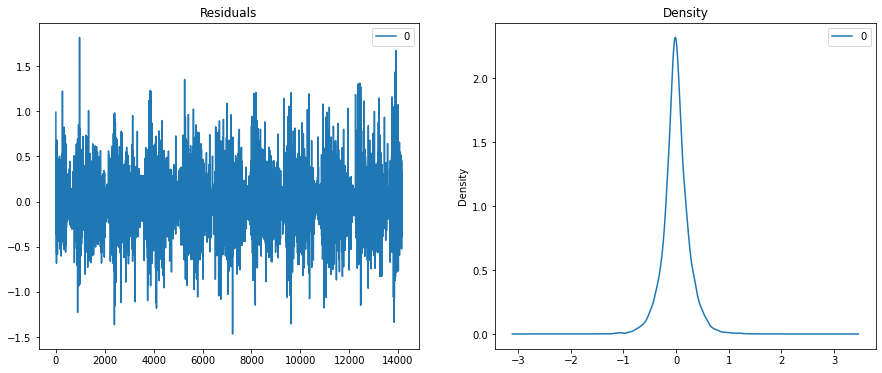

In [ ]:
# az_data_fit = auto_arima(az_data_scaled,trace=True,suppress_warnings=True,error_action='ignore')

train_size = np.int(len(az_data_scaled)*0.8)

train = az_data_scaled[0:train_size]
test = az_data_scaled[train_size:]

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(az_data_scaled,order=(2,1,1))
model=model.fit()
model.summary()

residuals = pd.DataFrame(model.resid)

fig1, ax1 = plt.subplots(1,2)

residuals.plot(title="Residuals", ax=ax1[0])

residuals.plot(kind='kde', title='Density', ax=ax1[1])

plt.show()




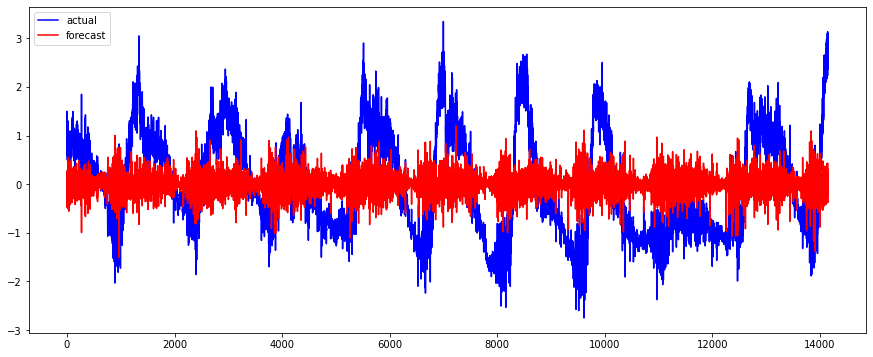

In [ ]:
fig,ax = plt.subplots()
ax.plot(az_data_scaled, '-b', label = 'actual')
ax.plot(model.fittedvalues, '-r', label = 'forecast')
leg = ax.legend()
# model.fittedvalues

In [ ]:
#@title
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

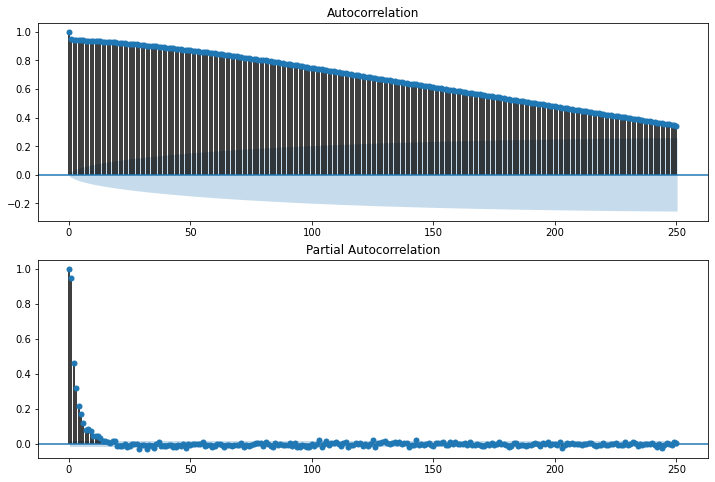

In [ ]:
#@title
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(az_data_scaled, lags=250, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(az_data_scaled, lags=250, ax=ax2)# , lags=40

In [ ]:
# az_data_roll = pd.DataFrame(az_data_scaled)

# az_data_roll = az_data_roll.diff()
# #@title
# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(az_data_roll, lags=250, ax=ax1) # 
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(az_data_roll, lags=250, ax=ax2)# , lags=40

# az_data_roll.plot()

# # az_data_fit = auto_arima(az_data_roll,trace=True,suppress_warnings=True,error_action='ignore')



from statsmodels.tsa.arima_model import ARIMA
model_ar=ARIMA(az_data_roll.values,order=(2,0,2))
model_ar= model_ar.fit()
model_ar.summary()

residuals = pd.DataFrame(model_ar.resid)

fig, ax = plt.subplots(1,2)

residuals.plot(title="Residuals", ax=ax[0])

residuals.plot(kind='kde', title='Density', ax=ax[1])

plt.show()

plt.plot(az_data_roll)
plt.plot(model_ar.fittedvalues, color = 'red')




**Decomposition Plot**

In [ ]:
#@title
# decomposition = seasonal_decompose(az_data, model='additive', freq = 48)
# fig = decomposition.plot()
# fig.show()

**Plot ACF and PACF**

In [ ]:
#@title
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
#@title
# ?

In [ ]:
#@title
import statsmodels.api as sm

In [ ]:
# #@title
# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(ax_data_res, lags=50, ax=ax1) # 
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(ax_data_res, lags=50, ax=ax2)# , lags=40

In [ ]:
#@title
i

In [ ]:
#@title
ax_diff  = np.diff(ax_data_res.values, n = 1)

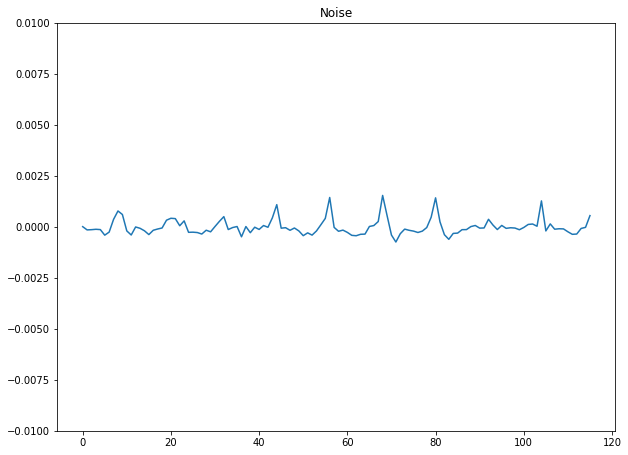

In [ ]:
#@title
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(ax_diff)
plt.ylim(-0.01,0.01)
plt.title('Noise')
plt.show()

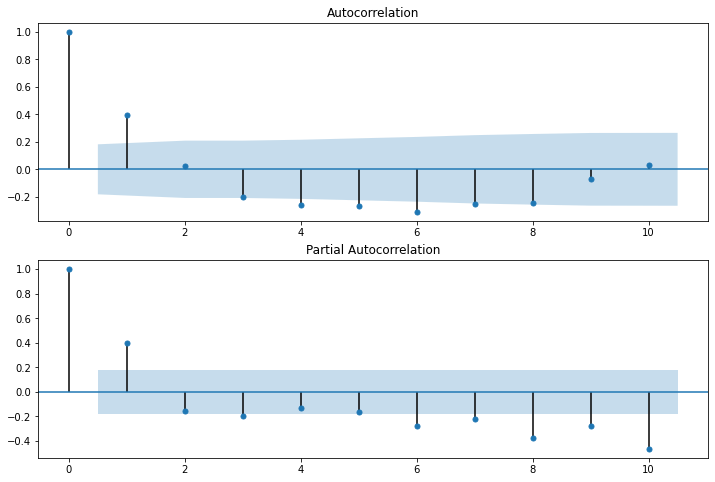

In [ ]:
#@title
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ax_diff, lags=10, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ax_diff, lags=10, ax=ax2)# , lags=40

#**ARIMA**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
start_index='2020-02-26'
end_index = '2020-02-28'

In [ ]:
def ARIMA_plot(data,ar_order):
  model = ARIMA(data, order = ar_order)
  model_fit = model.fit(disp=0,transparams=False)
  print(model_fit.summary())

  residuals = pd.Series(model_fit.resid)
  layout = go.Layout(yaxis=dict(range=[-0.0025,0.0025]))
  data_residuals = go.Scatter(x=residuals.index, y=residuals.values)
  figx = go.Figure(data = data_residuals,layout=layout)
  figx.show()

  # model_fit.plot_predict(start_index, end_index);
  plt.ylim(bottom=1.0145)
  plt.ylim(top=1.0175)

  forecast = model_fit.predict(start = start_index, end = end_index)
  ax_data_res.plot(label = 'Actual az(g)',legend='Actual az(g)')
  forecast.plot(label = 'Predicted az(g)',legend='Predicted az(g)',color='red')

  return forecast 

In [ ]:
forecast = ARIMA_plot(ax_data_res,(3,0,0))

NameError: ignored

In [ ]:
forecast

ChipTime
2020-02-26 00:00:00    1.015115
2020-02-26 00:30:00    1.015113
2020-02-26 01:00:00    1.015082
2020-02-26 01:30:00    1.015084
2020-02-26 02:00:00    1.015129
                         ...   
2020-02-28 09:00:00    1.015886
2020-02-28 09:30:00    1.016156
2020-02-28 10:00:00    1.016721
2020-02-28 10:30:00    1.017336
2020-02-28 11:00:00    1.017601
Freq: 30T, Length: 119, dtype: float64

In [ ]:
ax_data_res[start_index:end_index]

ChipTime
2020-02-26 00:00:00    1.015094
2020-02-26 00:30:00    1.015062
2020-02-26 01:00:00    1.015053
2020-02-26 01:30:00    1.015080
2020-02-26 02:00:00    1.015062
                         ...   
2020-02-28 09:00:00    1.015995
2020-02-28 09:30:00    1.016488
2020-02-28 10:00:00    1.017061
2020-02-28 10:30:00    1.017425
2020-02-28 11:00:00    1.017648
Freq: 30T, Name: az(g), Length: 119, dtype: float64

**Accuracy Metrics**

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})


In [ ]:
forecast

ChipTime
2020-02-26 00:00:00    1.015115
2020-02-26 00:30:00    1.015113
2020-02-26 01:00:00    1.015082
2020-02-26 01:30:00    1.015084
2020-02-26 02:00:00    1.015129
                         ...   
2020-02-28 09:00:00    1.015886
2020-02-28 09:30:00    1.016156
2020-02-28 10:00:00    1.016721
2020-02-28 10:30:00    1.017336
2020-02-28 11:00:00    1.017601
Freq: 30T, Length: 119, dtype: float64

In [ ]:
forecast_accuracy(forecast, ax_data_res[start_index:end_index].values)

{'corr': 0.9819403550553314,
 'mae': 8.636357077738393e-05,
 'mape': 8.501491280030467e-05,
 'me': 9.681208767538682e-07,
 'minmax': 8.500971640101884e-05,
 'mpe': 9.72900538943368e-07,
 'rmse': 0.00011563718554601412}

***Auto ARIMA***

In [ ]:
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.

/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https:/

In [ ]:
stepwise_model = auto_arima(ax_data_res, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=48,
                           start_P=0, seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)